This notebook will be used to explore and analyse the Data Scientist dataset, and understand any insights of the data. The dataset was downloaded from kaggle.

In [1]:
# mount google drive

from google.colab import drive

drive.mount('/content/gdrive')
data_path = 'gdrive/MyDrive/Portfolio/DatasetsForData/'

Mounted at /content/gdrive


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# import DataScientist.csv

df_ds = pd.read_csv(data_path + 'DataScientist.csv')
df_ds.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [66]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            3909 non-null   object 
 1   Salary Estimate      3909 non-null   object 
 2   Rating               3909 non-null   float64
 3   Company Name         3909 non-null   object 
 4   Location             3909 non-null   object 
 5   Headquarters         3909 non-null   object 
 6   Size                 3909 non-null   object 
 7   Founded              3909 non-null   int64  
 8   Type of ownership    3909 non-null   object 
 9   Industry             3909 non-null   object 
 10  Sector               3909 non-null   object 
 11  Revenue              3909 non-null   object 
 12  Competitors          3909 non-null   object 
 13  Easy Apply           3909 non-null   object 
 14  Salary Estimate Min  3909 non-null   object 
 15  Salary Estimate Max  3909 non-null   o

# Data cleaning

Steps to undertake: 

1. Remove unnamed and index columns
2. Check each column separately and decide what actions to take 
3. Remove not essential information

In [118]:
# Drop columns

df_ds.drop(['Unnamed: 0', 'index', 'Job Description', 'Competitors'], axis=1, inplace=True)
df_ds.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,True
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1


In [39]:
df_ds['Easy Apply'].value_counts()

-1      3745
True     164
Name: Easy Apply, dtype: int64

These results are calculated using the value_counts() function

* *Job Title* has 2079 different entries
* *Salary Estimate* has 148 different entries 
* *Rating* has 37 different entries and 409 missing ratings
* *Company Name* has 2075 different entries
* *Location* has 191 different entries
* *Headquarters* has 543 different entries and 240 missing values
* *Size* has 9 different entries and 229 missing values, and 77 unknown
* *Founded* has 173 different entries
* *Type of ownership* has 15 different entries and 229 missing values, and 38 unknown
* *Industry* has 96 different entries and 546 missing values
* *Sector* has 26 different entries and 546 missing values
* *Revenue* has 14 different entries and 229 missing values, and 1163 unknown
* *Easy Apply* has 164 true and the rest missing values

Further actions:

General:
* Replace -1 with NaN (only at Easy Apply, replace -1 with False)

Salary Estimate:
* Convert the entries per hour into annual salary
* Remove any extra strings
* Create two new columns containing only the min and max salary estimates

Company Name:
* Remove \n4.5 - the number is equal to the rating

Size:
* Remove empolyees from the entries
* Create two columns containing only the min and max size 

Revenue:
* Convert the entries to min and max revenue

In [119]:
# Convert -1 into NaN

# Convert firstly Easy Apply
df_ds['Easy Apply'].replace('-1', 'False', inplace=True)

df_ds.replace('-1', np.nan, inplace=True)
df_ds.replace(-1.0, np.nan, inplace=True)

In [120]:
# Convert salary per hour to annual
hoursPerWeek = 40
weeksPerYear = 52

for i in range(df_ds.shape[0]):
    salary_estimate = df_ds.loc[i,"Salary Estimate"]
    salary_estimate = salary_estimate.replace("$", "")
    
    if "Per Hour" in salary_estimate:
        min_, max_ = salary_estimate.split("-")
        max_, _ = max_.split("Per")
        max_= max_.strip()
        min_ = int(min_) *hoursPerWeek*weeksPerYear*(1/1000)
        max_ = int(max_) *hoursPerWeek*weeksPerYear*(1/1000)
        
    else:
        min_, max_ = salary_estimate.split("-")
        min_ = min_.replace("K", "")
        max_, _= max_.split("(")
        max_=max_.replace("K", "")
        max_ = max_.strip()
    
        
    min_ = int(min_)
    max_ = int(max_)
    df_ds.loc[i,"Salary Estimate Min"] = min_
    df_ds.loc[i,"Salary Estimate Max"] = max_

df_ds.drop(['Salary Estimate'], axis=1, inplace=True)

In [121]:
# Remove /n.45 from company name 

df_ds['Company Name'] = df_ds['Company Name'].str.split("\n").str[0]

In [122]:
# Size of the company

# Replace Unknown with None
df_ds['Size'].replace('Unknown', None, inplace=True)
# Convert cells with 10000+ employees
df_ds['Size'] = df_ds['Size'].str.replace('+', 'plus', regex=True)
df_ds['Size'].replace('10000plus', '10000 to 10001', regex=True, inplace=True)
# Extract minimun size
df_ds['Size Min'] = df_ds['Size'].str.split("to").str[0]
# Extract maximum size
df_ds['Size Max'] = df_ds['Size'].str.split("to").str[1]
# Replace employees
df_ds['Size Max'].replace('employees', '', regex=True, inplace=True)

# Drop size column
df_ds.drop(['Size'], axis=1, inplace=True)

In [123]:
# Type of ownership
# Replace Unknown with None
df_ds['Type of ownership'].replace('Unknown', None, inplace=True)

In [124]:
# Revenue
# Replace Unknown with None
df_ds['Revenue'].replace('Unknown / Non-Applicable', None, inplace=True)

df_ds['Revenue'] = df_ds['Revenue'].str.replace('$', '', regex=True)
df_ds['Revenue'] = df_ds['Revenue'].str.replace('USD', '', regex=True)
df_ds['Revenue'] = df_ds['Revenue'].str.replace('(', '', regex=True)
df_ds['Revenue'] = df_ds['Revenue'].str.replace(')', '', regex=True)

# million = 10^6
# billion = 10^9

df_ds['Revenue'] = df_ds['Revenue'].str.replace('+', ' to 11', regex=True)
df_ds['Revenue'] = df_ds['Revenue'].str.replace('Less than', '0 to', regex=True)    

df_ds['Revenue'] = df_ds['Revenue'].str.replace('10 to 11 billion', '10000000000 to 11000000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('100 to 500 million', '100000000 to 500000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('2 to 5 billion', '2000000000 to 5000000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('50 to 100 million', '50000000 to 100000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('10 to 25 million', '10000000 to 25000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('1 to 2 billion', '1000000000 to 2000000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('1 to 5 million', '1000000 to 5000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('25 to 50 million', '25000000 to 50000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('5 to 10 billion', '5000000000 to 10000000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('0 to 1 million', '0 to 1000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('500 million to 1 billion', '500000000 to 1000000000', regex=True) 
df_ds['Revenue'] = df_ds['Revenue'].str.replace('5 to 10 million', '5000000 to 10000000', regex=True) 

# Extract minimun size
df_ds['Revenue Min'] = df_ds['Revenue'].str.split("to").str[0]
df_ds['Revenue Min'] = df_ds['Revenue Min'].replace('Unknown / Non-Applicable', np.nan)
# Extract maximum size
df_ds['Revenue Max'] = df_ds['Revenue'].str.split("to").str[1]

# Drop revenue column
df_ds.drop(['Revenue'], axis=1, inplace=True)

In [134]:
# Convert data types
df_ds['Size Min'] = df_ds['Size Min'].astype(float)
df_ds['Size Max'] = df_ds['Size Max'].astype(float)
df_ds['Revenue Min'] = df_ds['Revenue Min'].astype(float)
df_ds['Revenue Max'] = df_ds['Revenue Max'].astype(float)

# Calculate average revenue for each row
df_ds['Revenue Mean'] = df_ds[['Revenue Min', 'Revenue Max']].mean(axis=1)

# Calculate average salary for each row
df_ds['Salary Mean'] = df_ds[['Salary Estimate Min', 'Salary Estimate Max']].mean(axis=1)

# Data Visualisations

In [56]:
def bar_plot(column_name, num, Title, Xlabel):
  plt.figure(figsize=(15,7))
  color = plt.cm.Paired(np.arange(len(df_ds)))
  df_ds[column_name].value_counts().head(num).plot.bar(color=color, rot=90)
  plt.title(Title, fontsize=20)
  plt.xlabel(Xlabel, fontsize=15)
  plt.ylabel("Count", fontsize=15)

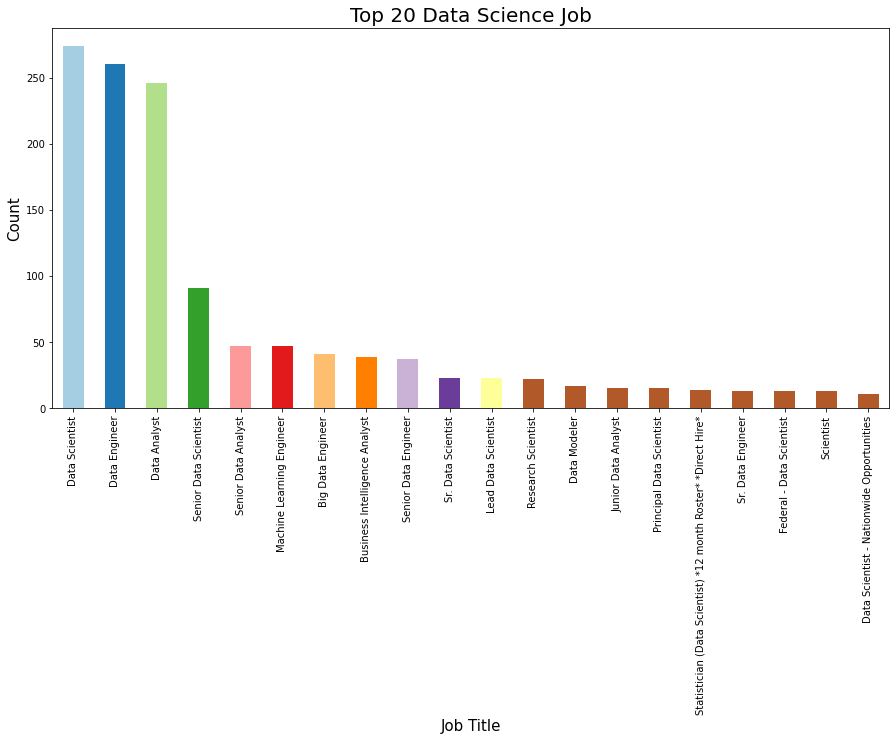

In [57]:
# Top 20 Data Science jobs based on Job Title
Title = "Top 20 Data Science Job"
Xlabel = "Job Title"
bar_plot('Job Title', 20, Title, Xlabel)

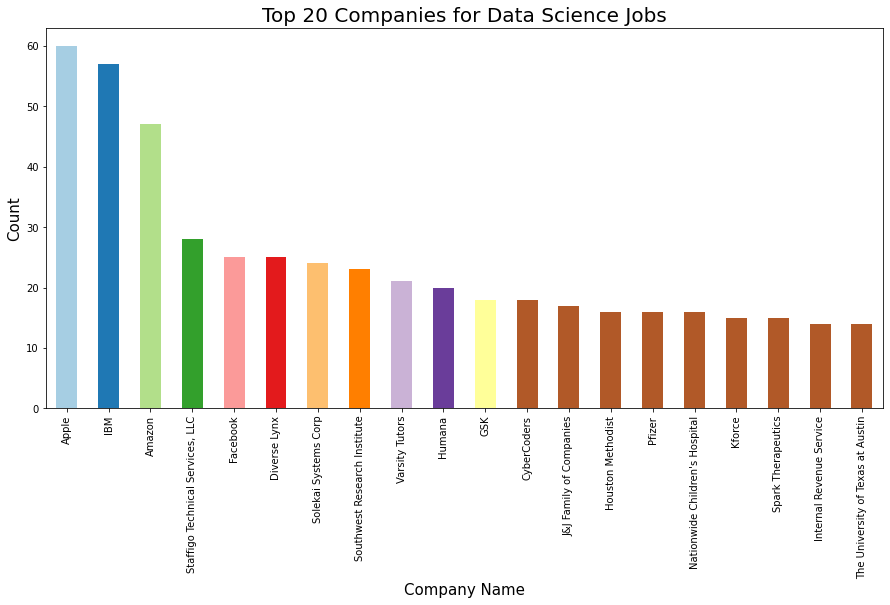

In [58]:
# Top 20 Data Science jobs based on Job Title
Title = "Top 20 Companies for Data Science Jobs"
Xlabel = "Company Name"
bar_plot('Company Name', 20, Title, Xlabel)

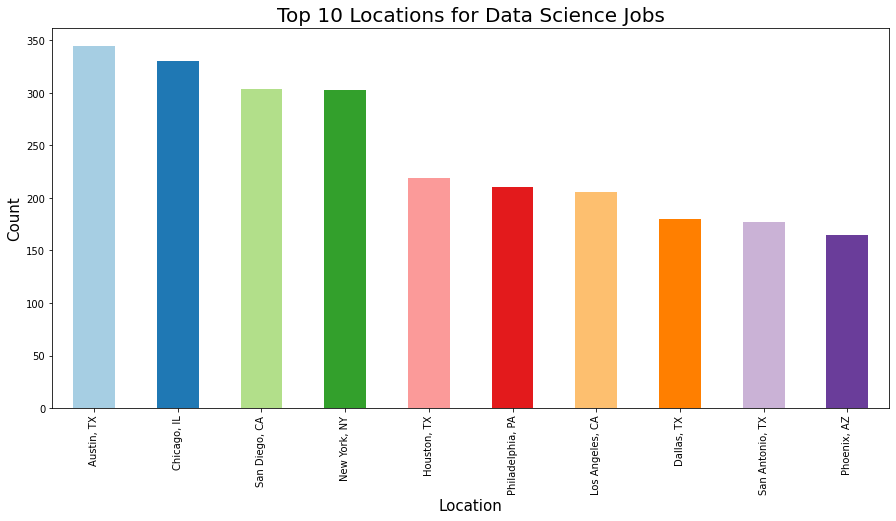

In [63]:
# Top 10 Locations for Data Science jobs
Title = "Top 10 Locations for Data Science Jobs"
Xlabel = "Location"
bar_plot('Location', 10, Title, Xlabel)

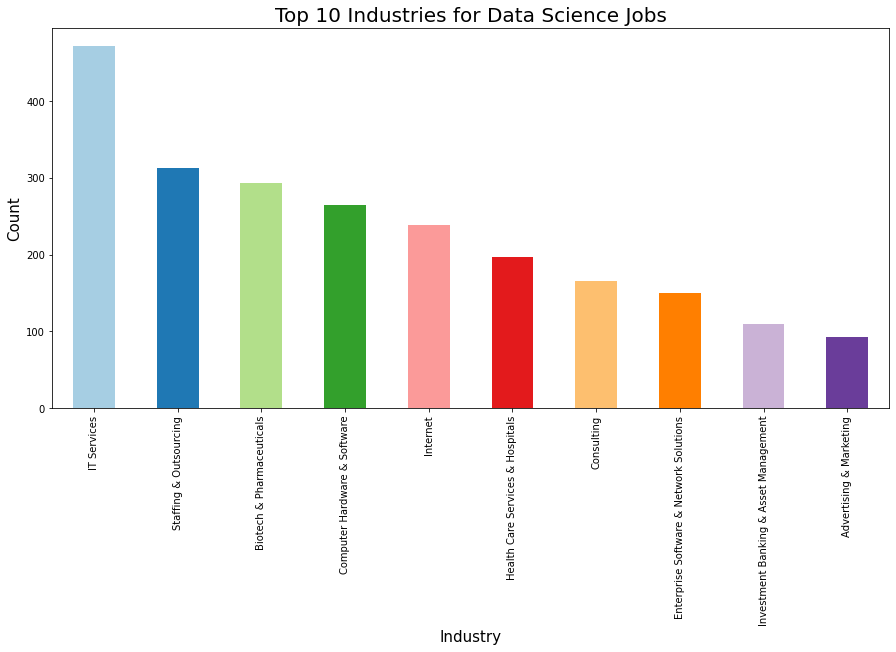

In [65]:
# Top 10 Industries for Data Science jobs
Title = "Top 10 Industries for Data Science Jobs"
Xlabel = "Industry"
bar_plot('Industry', 10, Title, Xlabel)

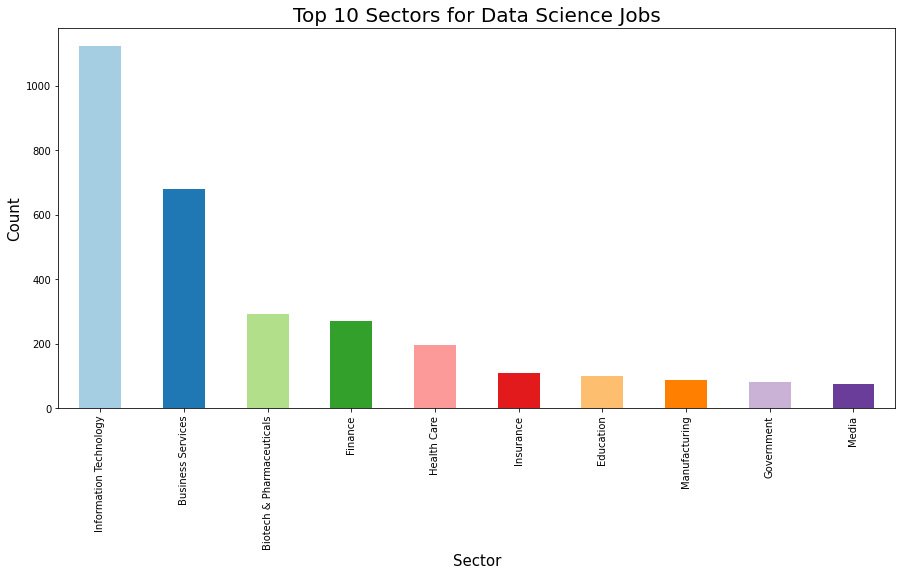

In [64]:
# Top 10 Sectors for Data Science jobs
Title = "Top 10 Sectors for Data Science Jobs"
Xlabel = "Sector"
bar_plot('Sector', 10, Title, Xlabel)

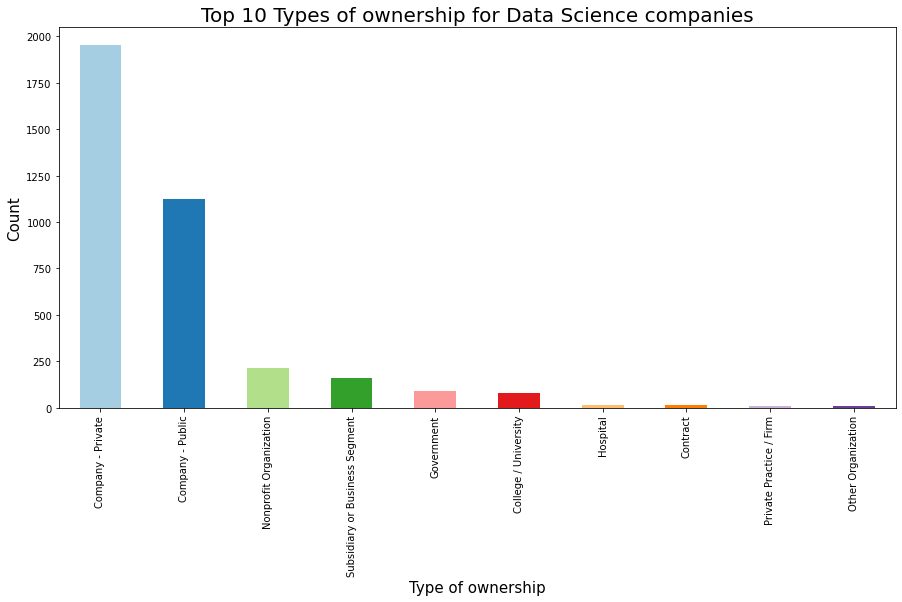

In [67]:
# Top 10 Types of ownership for Data Science companies
Title = "Top 10 Types of ownership for Data Science companies"
Xlabel = "Type of ownership"
bar_plot('Type of ownership', 10, Title, Xlabel)

Text(0.5, 0.98, 'Average Revenue and Salary of Top 10 Companies')

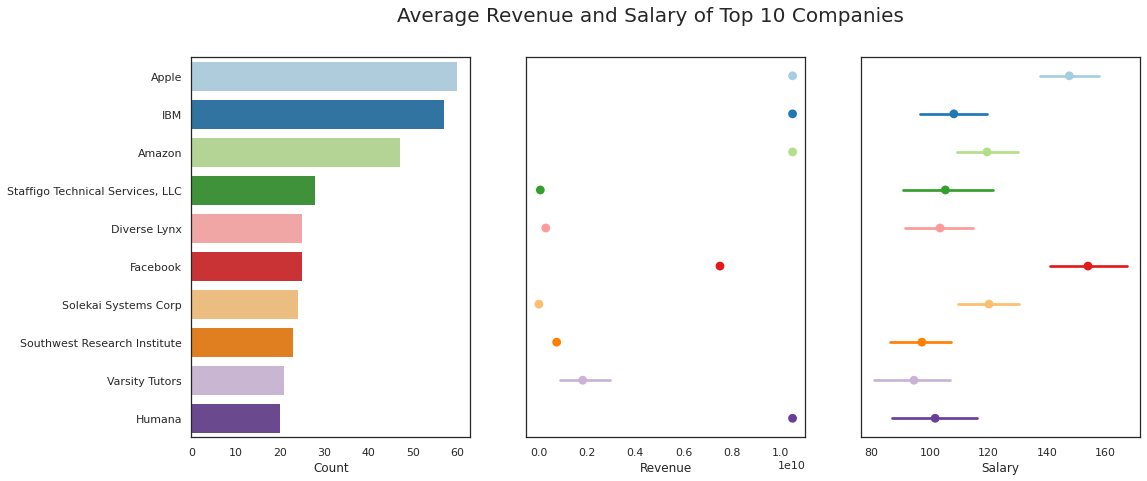

In [151]:
df_ds_per_company = df_ds.groupby('Company Name')['Job Title'].count().reset_index().sort_values( 
    'Job Title',ascending=False).head(10).rename(columns={'Job Title':'Count'})

info_per_company = df_ds_per_company.merge(df_ds[['Company Name', 'Revenue Mean', 'Salary Mean']], on='Company Name', how='left')

color = plt.cm.Paired(np.arange(len(df_ds)))
f, (axBar, axPointRevenue, axPointSalary) = plt.subplots(ncols=3, sharey=True, figsize=(17, 7))
sns.barplot(x='Count', y='Company Name', data=info_per_company, ax=axBar, palette=color).set(ylabel="")
sns.pointplot(x='Revenue Mean', y='Company Name', data=info_per_company, join=False, ax=axPointRevenue, palette=color).set(ylabel="", xlabel="Revenue")
sns.pointplot(x='Salary Mean', y='Company Name', data=info_per_company, join=False, ax=axPointSalary, palette=color).set(ylabel="", xlabel="Salary")
plt.suptitle('Average Revenue and Salary of Top 10 Companies',fontsize=20)

Text(0.5, 0.98, 'Average Revenue and Salary of Top 10 Companies')

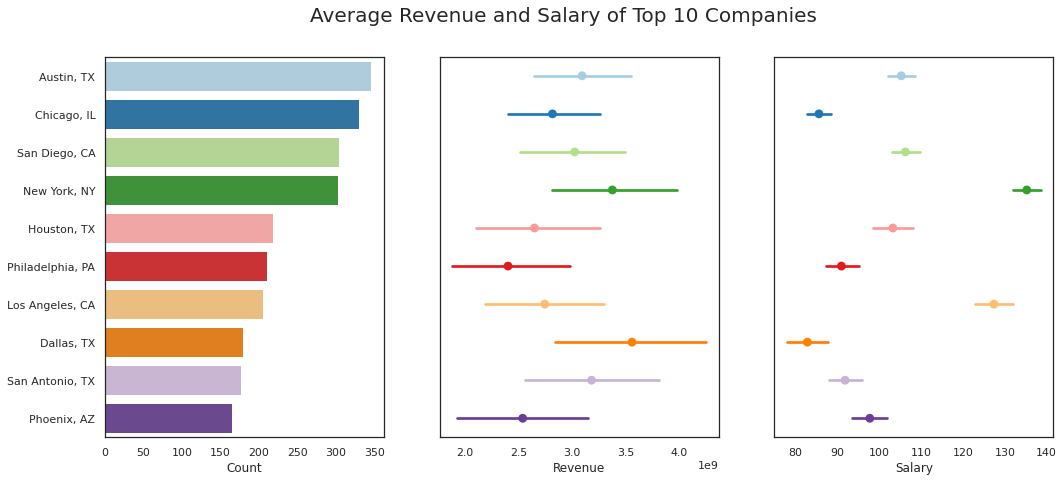

In [153]:
df_ds_per_location = df_ds.groupby('Location')['Job Title'].count().reset_index().sort_values( 
    'Job Title',ascending=False).head(10).rename(columns={'Job Title':'Count'})

info_per_location = df_ds_per_location.merge(df_ds[['Location', 'Revenue Mean', 'Salary Mean']], on='Location', how='left')

f, (axBar, axPointRevenue, axPointSalary) = plt.subplots(ncols=3, sharey=True, figsize=(17, 7))
sns.barplot(x='Count', y='Location', data=info_per_location, ax=axBar, palette=color).set(ylabel="")
sns.pointplot(x='Revenue Mean', y='Location', data=info_per_location, join=False, ax=axPointRevenue, palette=color).set(ylabel="", xlabel="Revenue")
sns.pointplot(x='Salary Mean', y='Location', data=info_per_location, join=False, ax=axPointSalary, palette=color).set(ylabel="", xlabel="Salary")
plt.suptitle('Average Revenue and Salary of Top 10 Companies',fontsize=20)

Text(0.5, 0.98, 'Average Revenue and Salary of Top 10 Data Science Sectors')

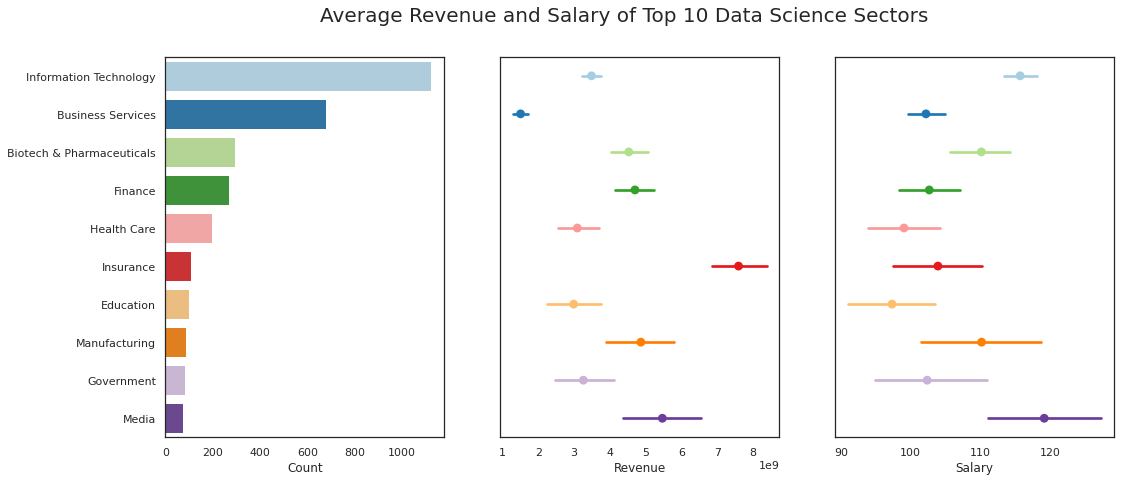

In [154]:
df_ds_per_sector = df_ds.groupby('Sector')['Job Title'].count().reset_index().sort_values( 
    'Job Title',ascending=False).head(10).rename(columns={'Job Title':'Count'})

info_per_sector = df_ds_per_sector.merge(df_ds[['Sector', 'Revenue Mean', 'Salary Mean']], on='Sector', how='left')

f, (axBar, axPointRevenue, axPointSalary) = plt.subplots(ncols=3, sharey=True, figsize=(17, 7))
sns.barplot(x='Count', y='Sector', data=info_per_sector, ax=axBar, palette=color).set(ylabel="")
sns.pointplot(x='Revenue Mean', y='Sector', data=info_per_sector, join=False, ax=axPointRevenue, palette=color).set(ylabel="", xlabel="Revenue")
sns.pointplot(x='Salary Mean', y='Sector', data=info_per_sector, join=False, ax=axPointSalary, palette=color).set(ylabel="", xlabel="Salary")
plt.suptitle('Average Revenue and Salary of Top 10 Data Science Sectors',fontsize=20)

Text(0.5, 0.98, 'Average Revenue and Salary of Top 10 Ownership Company Type')

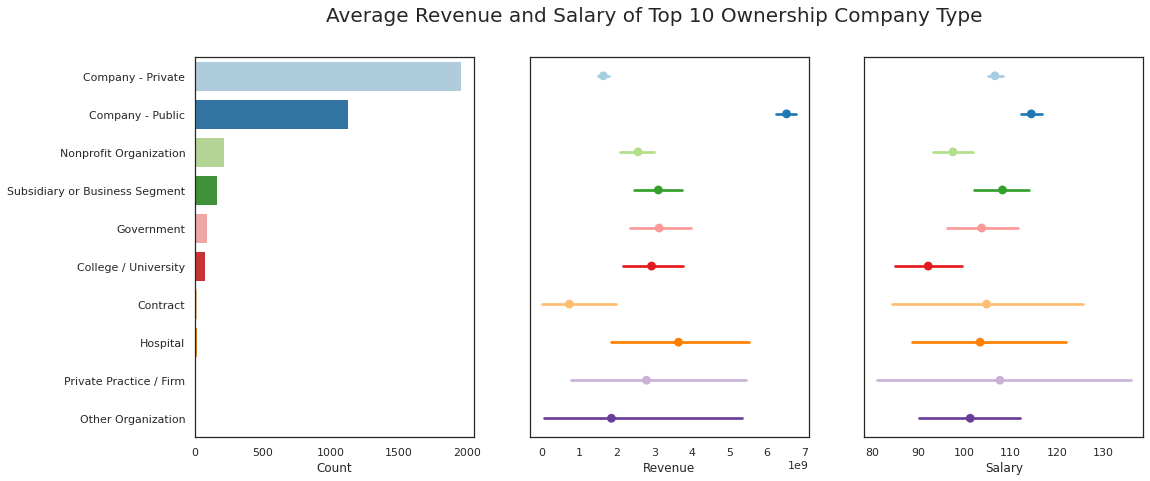

In [156]:
df_ds_per_ownership = df_ds.groupby('Type of ownership')['Job Title'].count().reset_index().sort_values( 
    'Job Title',ascending=False).head(10).rename(columns={'Job Title':'Count'})

info_per_sector = df_ds_per_ownership.merge(df_ds[['Type of ownership', 'Revenue Mean', 'Salary Mean']], on='Type of ownership', how='left')

f, (axBar, axPointRevenue, axPointSalary) = plt.subplots(ncols=3, sharey=True, figsize=(17, 7))
sns.barplot(x='Count', y='Type of ownership', data=info_per_sector, ax=axBar, palette=color).set(ylabel="")
sns.pointplot(x='Revenue Mean', y='Type of ownership', data=info_per_sector, join=False, ax=axPointRevenue, palette=color).set(ylabel="", xlabel="Revenue")
sns.pointplot(x='Salary Mean', y='Type of ownership', data=info_per_sector, join=False, ax=axPointSalary, palette=color).set(ylabel="", xlabel="Salary")
plt.suptitle('Average Revenue and Salary of Top 10 Ownership Company Type',fontsize=20)

Text(0.5, 1.0, 'Heatmap of Average Salary per Location and Sector')

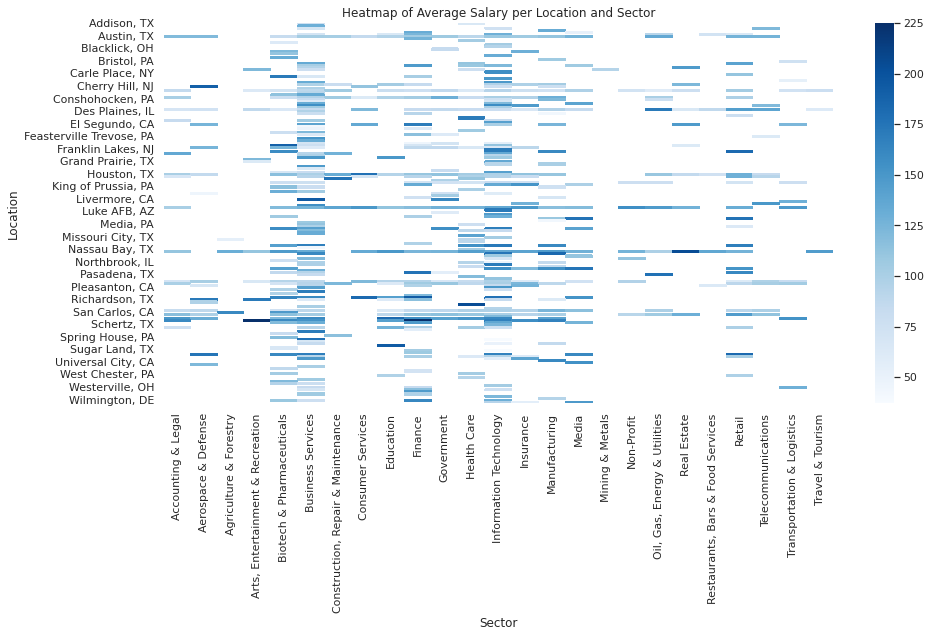

In [171]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_ds.pivot_table(index='Location', columns='Sector', values='Salary Mean'), cmap='Blues')
plt.title('Heatmap of Average Salary per Location and Sector')

Text(0.5, 1.0, 'Heatmap of Average Revenue per Location and Sector')

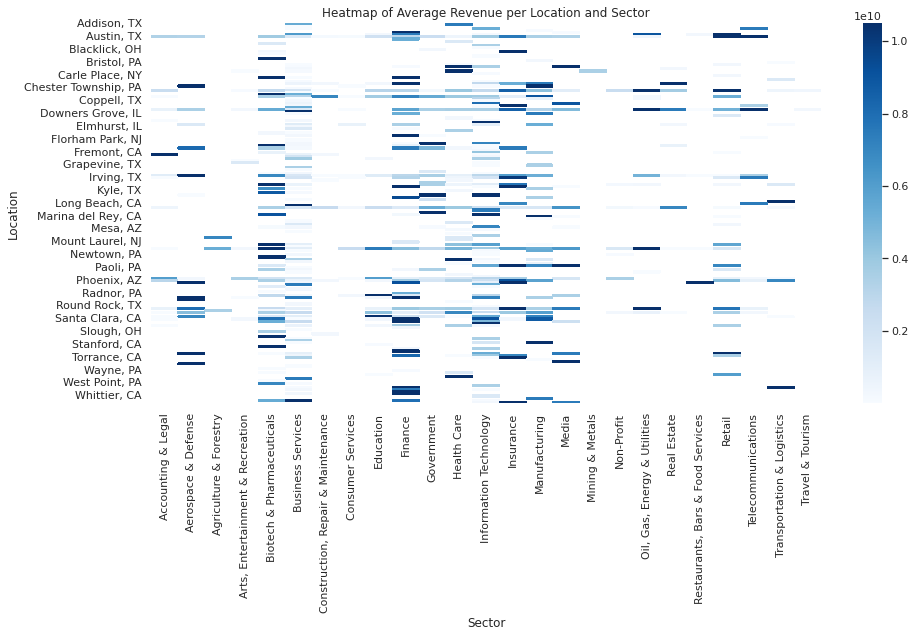

In [180]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_ds.pivot_table(index='Location', columns='Sector', values='Revenue Mean'), cmap='Blues')
plt.title('Heatmap of Average Revenue per Location and Sector')

Text(0.5, 1.0, 'Heatmap of Average Revenue per Location and Sector')

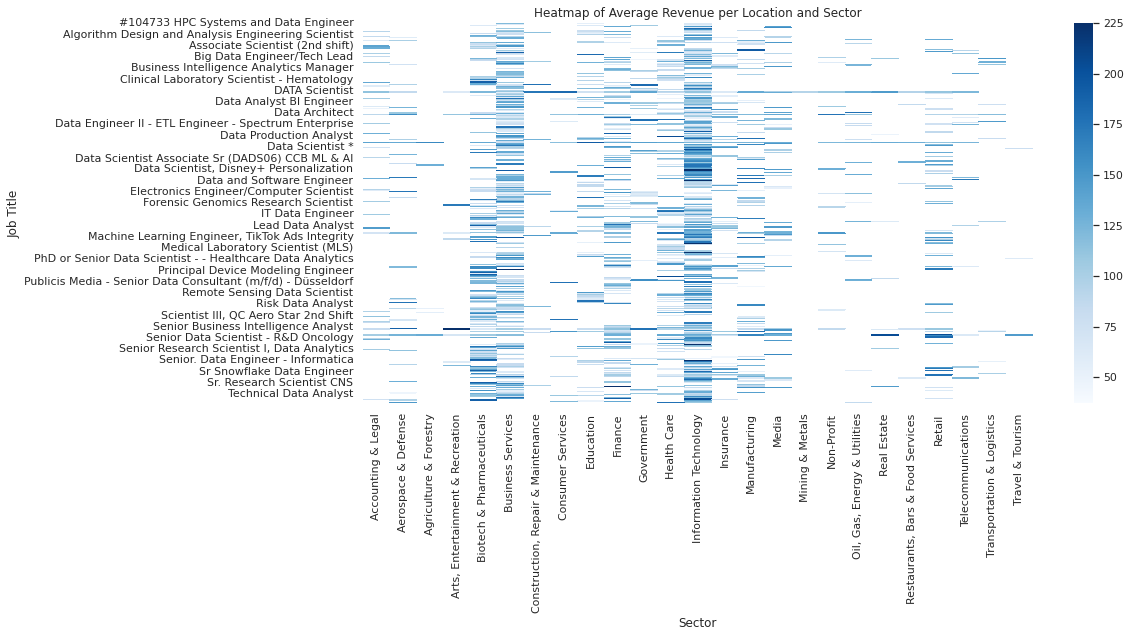

In [177]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_ds.pivot_table(index='Job Title', columns='Sector', values='Salary Mean'), cmap='Blues')
plt.title('Heatmap of Average Revenue per Location and Sector')

[Text(0, 0.5, 'Jobs advertised'), Text(0.5, 0, 'Year founded')]

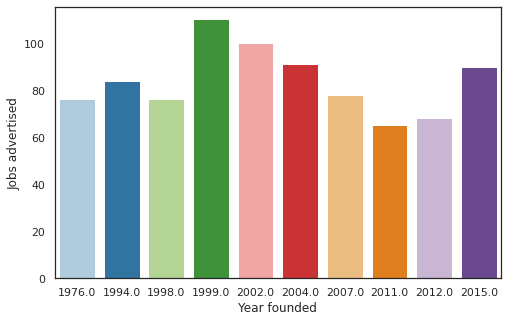

In [185]:
df_ds_per_year_founded = df_ds.groupby('Founded')['Job Title'].count().reset_index().sort_values(
    'Job Title',ascending=False).head(10).rename(columns={'Job Title':'Count'})

plt.figure(figsize=(8, 5))
sns.barplot(x='Founded', y='Count', data=df_ds_per_year_founded, palette=color).set(ylabel="Jobs advertised", xlabel="Year founded")